In [1]:
!pip install gymnasium[atari]==1.0
!pip install ale_py


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\maria\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\maria\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import gymnasium as gym
import ale_py

env = gym.make("ALE/Freeway-v5", difficulty = 0, mode = 2, obs_type = "rgb", render_mode = "rgb_array")

print(f"Action space is {env.action_space}") # NOOP, UP, DOWN
print(f"Observation space is {env.observation_space}") # Image of 210 x 160 px

Action space is Discrete(3)
Observation space is Box(0, 255, (210, 160, 3), uint8)


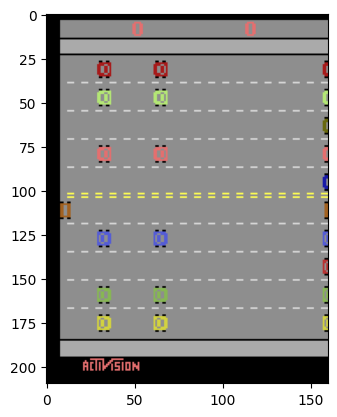

In [3]:
import matplotlib.pyplot as plt
env.reset()
img = env.render()
plt.imshow(img)

In [4]:
array, _, _, _, _ = env.step(1)

array

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

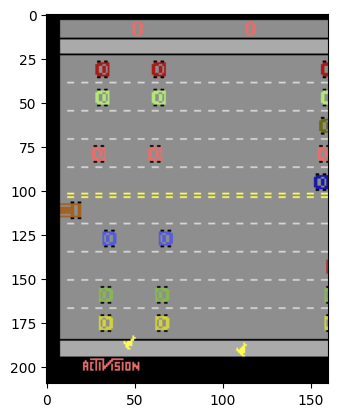

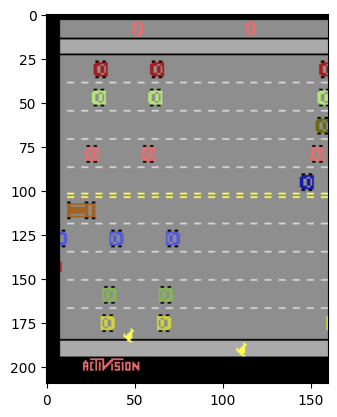

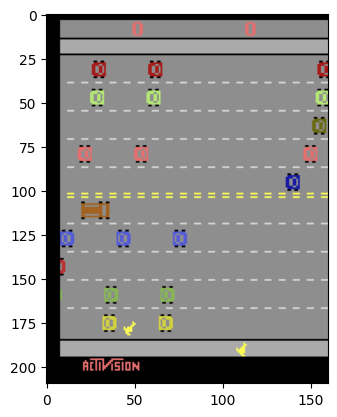

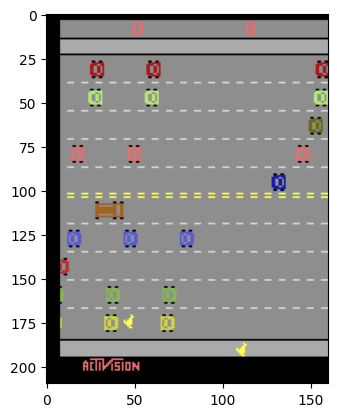

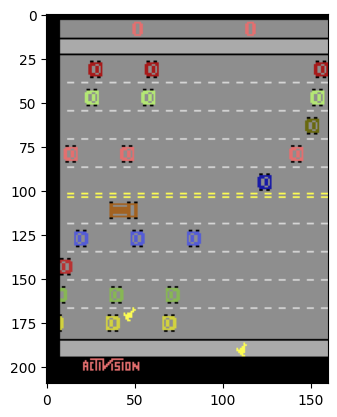

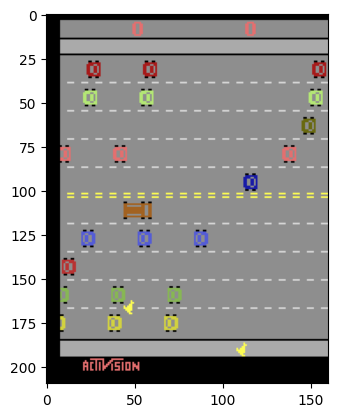

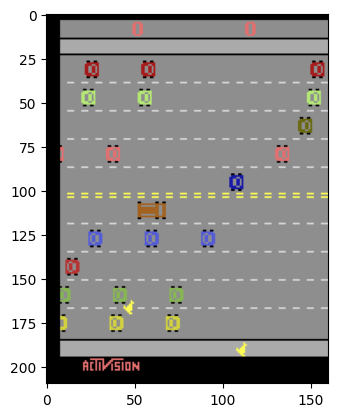

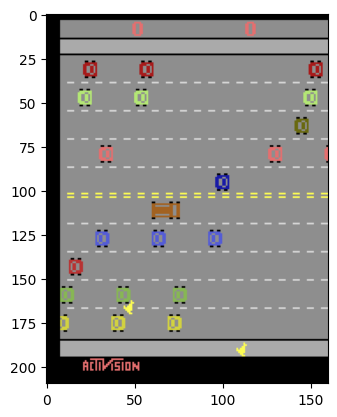

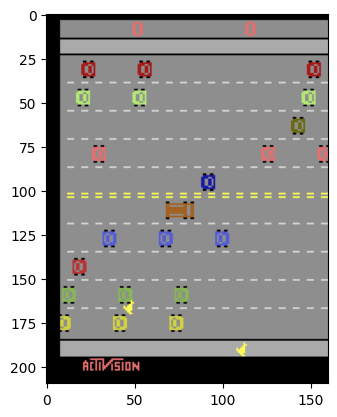

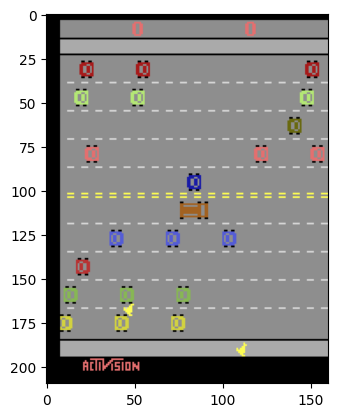

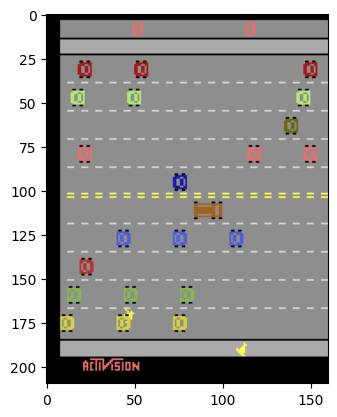

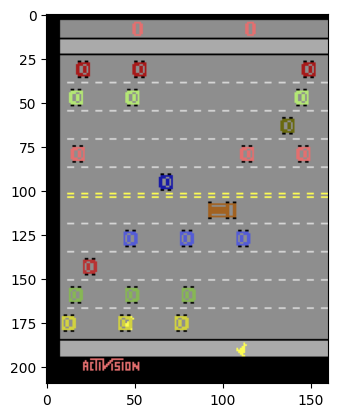

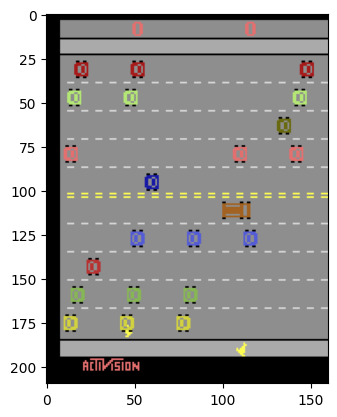

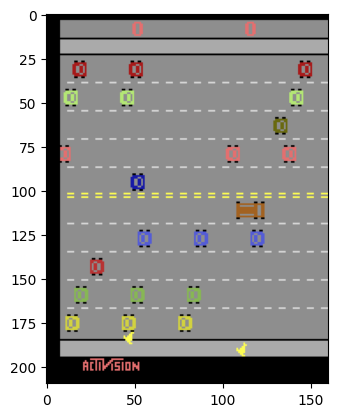

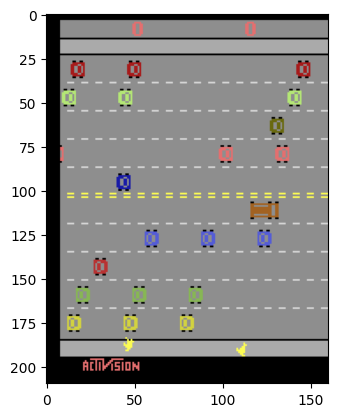

In [5]:
env.reset()
env.step(1)
array = env.render()
plt.imshow(array)
plt.show()

env.step(1)
array = env.render()
plt.imshow(array)
plt.show()

env.step(1)
array = env.render()
plt.imshow(array)
plt.show()

env.step(1)
array = env.render()
plt.imshow(array)
plt.show()

env.step(1)
array = env.render()
plt.imshow(array)
plt.show()

env.step(1)
array = env.render()
plt.imshow(array)
plt.show()

env.step(0)
array = env.render()
plt.imshow(array)
plt.show()

env.step(0)
array = env.render()
plt.imshow(array)
plt.show()

env.step(0)
array = env.render()
plt.imshow(array)
plt.show()

env.step(0)
array = env.render()
plt.imshow(array)
plt.show()

env.step(0)
array = env.render()
plt.imshow(array)
plt.show()

env.step(0)
array = env.render()
plt.imshow(array)
plt.show()

env.step(0)
array = env.render()
plt.imshow(array)
plt.show()

env.step(1)
array = env.render()
plt.imshow(array)
plt.show()

env.step(1)
array = env.render()
plt.imshow(array)
plt.show()

In [6]:
import numpy as np
np.save("freeway.npy", array)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
# array = np.load("ss-freeway.npy")

roads = [183, 167, 151, 135, 119, 103, 87, 71, 55, 39, 23]

In [8]:
cars_bottom = np.array(roads[:-1])-4
cars_top = np.array(roads[1:])+5

<Figure size 1000x800 with 0 Axes>

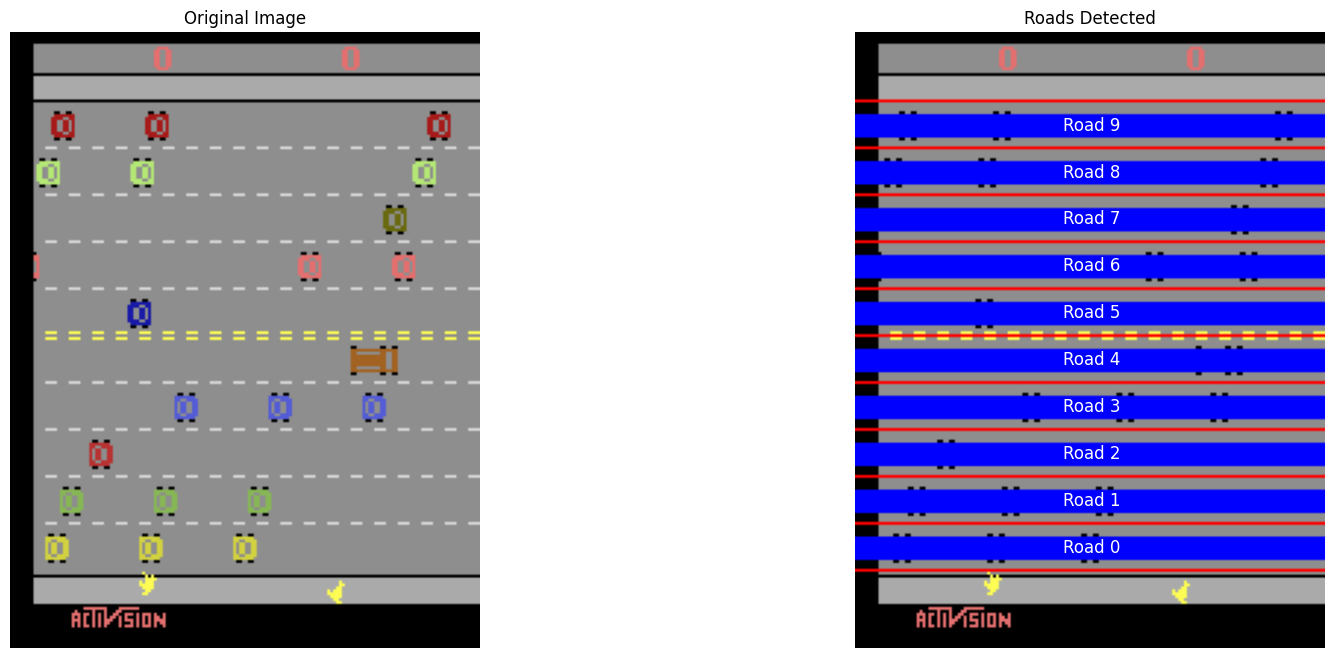

In [9]:

plt.figure(figsize=(10, 8))
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

axs[0].imshow(array)
axs[0].set_title('Original Image')
axs[0].axis('off')

array_with_roads = array.copy()
array_with_roads[roads, :] = (255, 0, 0)
array_with_roads[cars_bottom, :] = (0, 0, 255)
array_with_roads[cars_top, :] = (0, 0, 255)
axs[1].imshow(array_with_roads)
axs[1].set_title('Roads Detected')
axs[1].axis('off')

for bottom, top in zip(cars_bottom, cars_top):
    array_with_roads[top:bottom, :] = (0, 0, 255)
    axs[1].text(array_with_roads.shape[1] // 2, top+5, f'Road {roads.index(bottom + 4)}', color='white', fontsize=12, ha='center')

axs[1].imshow(array_with_roads)

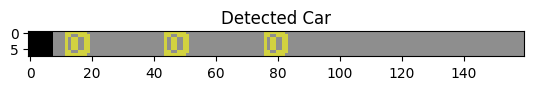

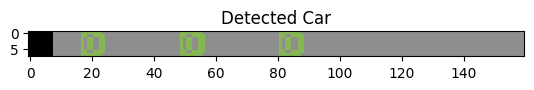

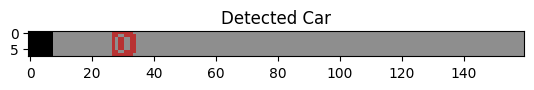

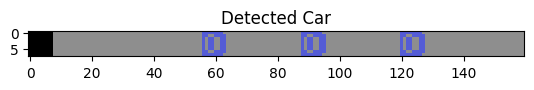

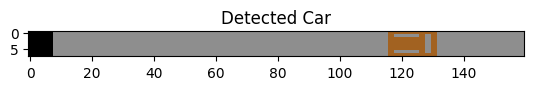

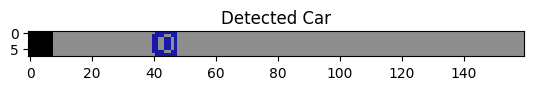

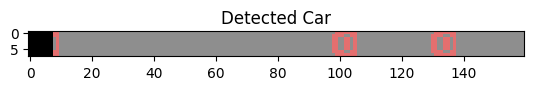

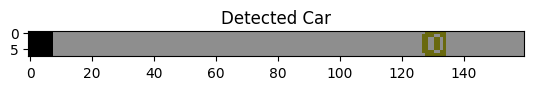

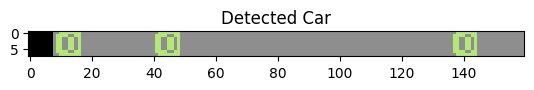

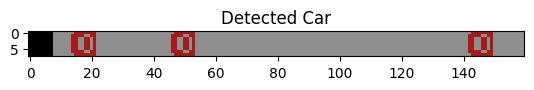

In [10]:
for i in range(0, len(roads)-1):
    detected_car = array[cars_top[i]:cars_bottom[i]+1, :, :]
    plt.imshow(detected_car)
    plt.title('Detected Car')
    plt.show()

(160,)


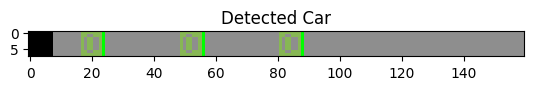

In [11]:
#getting the first road
detected_car = array[cars_top[1]:cars_bottom[1]+1, :, :].copy()

color_road = [142, 142, 142]
bbox = np.all(detected_car == color_road, axis=2)

pattern2search = np.array([True, False, False, False, False, False, False, True])
found = np.all(bbox == pattern2search.reshape(-1, 1), axis=0)
slided_found = np.concatenate([[False], found[:-1]])
print(slided_found.shape)
# slided_found = bbox and slided_found

all_road = np.all(bbox, axis=0)
slided_found = np.logical_and(all_road, slided_found)
slided_found = np.concatenate([slided_found[1:], [False]])

# cars_and_direction = found + slided_found
cars_and_direction = found.astype(int) + slided_found.astype(int)
# if 1 then car is going left, if 2 then car is going right, if 0 then there is no car

# visualizing the detected car
detected_car = detected_car.copy()
detected_car[:, cars_and_direction == 1] = [255, 0, 0]
detected_car[:, cars_and_direction == 2] = [0, 255, 0]
plt.imshow(detected_car)
plt.title('Detected Car')
plt.show()

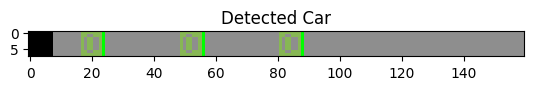

In [ ]:
def detect_cars_and_directions(array, cars_top, cars_bottom, index):
    detected_car = array[cars_top[index]:cars_bottom[index]+1, :, :].copy()

    # Define the road color
    color_road = [142, 142, 142]

    # Create a boolean mask for pixels matching the road color
    bbox = np.all(detected_car == color_road, axis=2)  # Shape: (H, 160)

    # Define the pattern to search
    pattern2search = np.array([True, False, False, False, False, False, False, True])

    # Find columns where the pattern matches
    found = np.all(bbox == pattern2search.reshape(-1, 1), axis=0)

    # Slide the found pattern to check for the reverse direction
    slided_found = np.concatenate([[False], found[:-1]])

    # Combine the mask with the road alignment
    all_road = np.all(bbox, axis=0)
    slided_found = np.logical_and(all_road, slided_found)
    slided_found = np.concatenate([slided_found[1:], [False]])

    # Determine car direction:
    # - 1 indicates car moving left, 2 indicates car moving right
    cars_and_direction = found.astype(int) + slided_found.astype(int)

    return cars_and_direction

index = 1  # Analyzing the first car region
result = detect_cars_and_directions(array, cars_top, cars_bottom, index)

# Visualizing the detected car directions
detected_car = array[cars_top[index]:cars_bottom[index] + 1, :, :].copy()
detected_car[:, result == 1] = [255, 0, 0]  # Red for left
detected_car[:, result == 2] = [0, 255, 0]  # Green for right

plt.imshow(detected_car)
plt.title('Detected Car')
plt.show()

In [285]:
def find_bunny(array_with_roads, final_array, roads):
    yellow = [252, 252, 84]
    yellow_pixels = np.all(array_with_roads == yellow, axis=2)
    yellow_pixels_shifted = np.concatenate([yellow_pixels[1:], yellow_pixels[:1]], axis=0)
    bunnies = np.logical_and(yellow_pixels, yellow_pixels_shifted)
    
    x_bunny = np.any(bunnies, axis=0)
    y_bunny = np.any(bunnies, axis=1)

    bunny_road = None
    for i in range(len(roads), -1, -1):
        if i == 0:
            found = np.any(y_bunny[roads[i]:])
            # print('found:', found, 'roads[i]:', roads[i])
        elif i == len(roads):
            found = np.any(y_bunny[:roads[i-1] + 1])
            # print('found:', found, 'roads[i-1]:', roads[i-1])
        else:
            found = np.any(y_bunny[roads[i]:roads[i-1] + 1])
            # print('found:', found, 'roads[i]:', roads[i], 'roads[i-1]:', roads[i-1])
        
        if found:
            bunny_road = i
            # print('bunny is on:', bunny_road)
            break

    final_array[bunny_road, x_bunny] = 3


In [282]:
# !conda install opencv-python

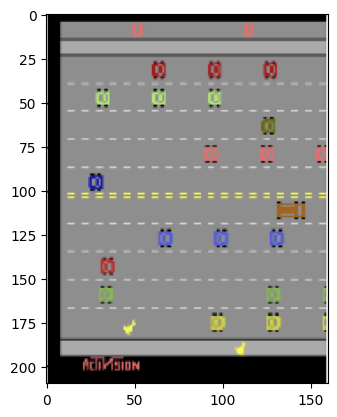

In [283]:
array2 = plt.imread(r'C:\Users\maria\Documents\4t_AI\ParadigmsML\Project\Project_RL\output.png')
array2 = array2[12:-33, 45:330, :]
from PIL import Image
array2 = np.array(Image.fromarray((array2 * 255).astype(np.uint8)).resize((160, 210), Image.NEAREST).convert('RGB'))
plt.imshow(array2)
plt.show()

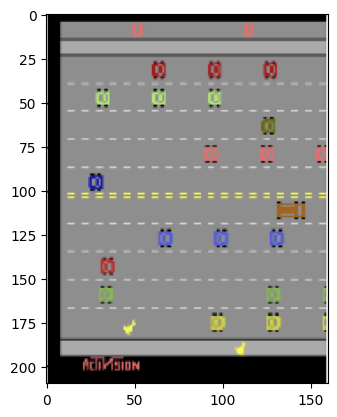

found: False roads[i-1]: 23
found: False roads[i]: 23 roads[i-1]: 39
found: False roads[i]: 39 roads[i-1]: 55
found: False roads[i]: 55 roads[i-1]: 71
found: False roads[i]: 71 roads[i-1]: 87
found: False roads[i]: 87 roads[i-1]: 103
found: False roads[i]: 103 roads[i-1]: 119
found: False roads[i]: 119 roads[i-1]: 135
found: False roads[i]: 135 roads[i-1]: 151
found: False roads[i]: 151 roads[i-1]: 167
found: True roads[i]: 167 roads[i-1]: 183
bunny is on: 1


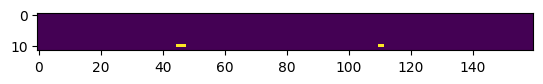

In [284]:
array_with_roads = array2.copy()
plt.imshow(array_with_roads)
plt.show()

final_array = np.zeros((len(roads)+1, array.shape[1]), dtype=int)

find_bunny(array_with_roads, final_array, roads)

plt.imshow(final_array[::-1, :])
plt.show()

bunny is on: 0


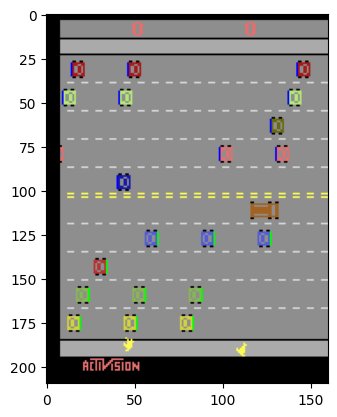

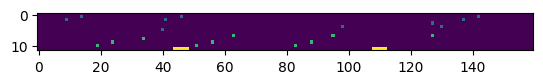

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0] 1


([-1, 1, -1, 2, -1, 1, 19, 2], np.int64(0))

In [ ]:
array_with_roads = array.copy()

final_array = np.zeros((len(roads)+1, array.shape[1]), dtype=int)
for road in range(len(roads)-1):
    result = detect_cars_and_directions(array, cars_top, cars_bottom, road)

    array_with_roads[cars_top[road]:cars_bottom[road] + 1, result == 1] = [0, 0, 255]  # Red for left
    array_with_roads[cars_top[road]:cars_bottom[road] + 1, result == 2] = [0, 255, 0]  # Green for right
    final_array[road+1] = result

# find_bunny(array_with_roads, final_array, roads)

plt.imshow(array_with_roads)
plt.show()

plt.imshow(final_array[::-1, :])
plt.show()

# frame2state(final_array)

bunny is on: 0


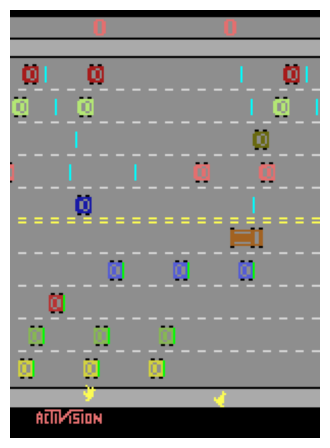

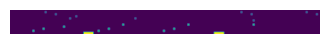

[0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0] 1


([-1, 1, -1, 2, -1, 1, 11, 2], np.int64(0))

In [ ]:
array_with_roads = array.copy()[:, 8:, :]

final_array = np.zeros((len(roads)+1, array_with_roads.shape[1]), dtype=int)
for road in range(len(roads)-1):
    result = detect_cars_and_directions(array_with_roads, cars_top, cars_bottom, road)

    array_with_roads[cars_top[road]:cars_bottom[road] + 1, result[::-1] == 1] = [0, 255, 255] 
    array_with_roads[cars_top[road]:cars_bottom[road] + 1, result == 2] = [0, 255, 0]
    if np.any(result==1):
        final_array[road+1] = result[::-1]
    else:
        final_array[road+1] = result

find_bunny(array_with_roads, final_array, roads)
# plt.axvline(x=7, color='r', linestyle='--')
plt.figure(figsize=(4, 8))
plt.imshow(array_with_roads)
plt.axis('off')
plt.show()

plt.figure(figsize=(4, 8))
plt.imshow(final_array[::-1, :])
plt.axis('off')
plt.show()

In [182]:
def frame2state(final_array):
    final_array_copy = final_array.copy()
    pos_bunny = np.where(final_array_copy == 3)
    bunny_x = pos_bunny[1][4]
    bunny_y = pos_bunny[0][0]
    
    final_array_copy = final_array_copy[:bunny_y+2, :bunny_x]
    # plt.imshow(final_array_copy[::-1, :])
    # plt.show()
    
    final_array_copy = (final_array_copy == 1) | (final_array_copy == 2)
    # plt.imshow(final_array_copy[::-1, :], cmap='gray')
    # plt.show()
    
    state = tuple(final_array_copy[::-1, :].reshape(-1))
    
    # state = []
    # print(final_array)
    # y, x = np.where(final_array == 3)
    # state.append(int(x[0]))
    # state.append(int(y[0]))
    # current_road = y[0]
    # x = np.where(final_array[current_road].reshape(-1) == 1)[0]
    # if len(x) == 0:
    #     x = [-1]
    # state.append(int(x[0]))
    # state.append(1)

    # # print(current_road)
    # next_road = current_road + 1
    # x = np.where(final_array[next_road].reshape(-1) == 1)[0]
    # if len(x) == 0:
    #     x = [-1]
    # state.append(int(x[0]))
    # state.append(1)

    return state, bunny_y

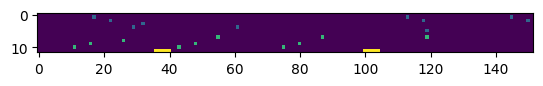

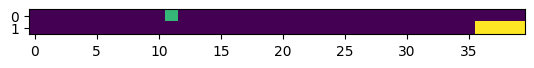

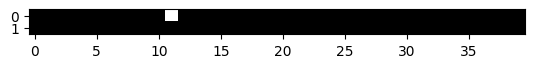

([-1, 1, -1, 1], np.int64(0))

In [177]:
plt.imshow(final_array[::-1, :])
plt.show()

frame2state(final_array)

In [288]:
def process_frame(array, roads, cars_top, cars_bottom, seen_roads):
    final_array = np.zeros((len(roads)-1, array.shape[1]), dtype=int)
    for road in range(len(roads)-1):
        result = detect_cars_and_directions(array, cars_top, cars_bottom, road)
        final_array[(len(roads)-2)-road] = result

    find_bunny(array, final_array, roads)

    # plt.imshow(final_array[::-1, :]
    # plt.imshow(final_array[::-1, :])
    # plt.show()

    state, current_road = frame2state(final_array)
    # print(current_road)
    reward = 0
    if seen_roads[current_road] == 0:
        seen_roads[current_road] = 1
        reward = 1
    return state, reward

In [201]:
env.reset()
env.step(1)
env.render()
print()

In [290]:
import numpy as np
from collections import defaultdict
import sys
from tqdm import tqdm

def make_epsilon_greedy_policy(Q, epsilon, num_Actions):
    """
    Creates an epsilon-greedy policy based on a Q and epsilon action value function

    Args:
         Q: A dictionary whose correspondence is state -> action-values.
            Each value is a numpy array of length num_Actions (see below)
         epsilon: The probability of selecting a random action (float between 0 and 1).
         num_Actions: Number of actions in the environment. (in the case of WIndyGridWorld it is 4)

    Returns:
         A function that takes the observation as an argument and returns as a result
         the probabilities of each action as a numpy array of length num_Actions.
    """
    def policy_fn(observation):
        observation = tuple(observation)
        A = np.ones(num_Actions, dtype=float) * epsilon / num_Actions
        # print(observation, Q.keys())
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)

        return A

    return policy_fn


def mc_control_on_policy_epsilon_greedy(env, num_episodes, discount=1.0, epsilon=0.1, epsilon_decay=0.9):
    """
    Control by Monte Carlo methods using Epsilon-Greedy policies
    Find an epsilon-greedy policy.

    Args:
         env: Gymnasium environment.
         num_episodes: Number of episodes in the sample.
         discount: discount factor.
         epsilon: The probability of selecting a random action (float between 0 and 1)

    Returns:
         A tuple (Q, policy).
         Q: A dictionary whose correspondence is state -> action-values.
         policy: A function that takes the observation as an argument and returns as a result
                 the probabilities of each action
    """

    # We store the sum and number of returns for each state to calculate the average.
    # We could use an array to store all the returns, but it is inefficient in terms of memory.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)

    # The Q action value function.
    # A nested dictionary whose correspondence is state -> (action -> action-value).
    # Initially we initialize it to zero
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    # Rewards
    y = np.zeros(num_episodes, dtype=np.float16)

    for i_episode in tqdm(range(num_episodes)):
        seen_roads = np.zeros((len(roads)-1))
        # The policy we are following
        policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)

        # We update epsilon
        epsilon = max(epsilon * epsilon_decay, 0.01)

        # We generate an episode and store it
        # An episode is an array of tuples (state, action, reward)
        episode = []
        state, _ = env.reset()
        state, _, _, _, _ = env.step(1)
        screen = env.render()
        # plt.imshow(screen)
        # plt.show()
        state, reward = process_frame(state, roads, cars_top, cars_bottom, seen_roads)
        # print(state)
        done = False
        total_reward = 0
        while not done:
            probs = policy(state)
            action = np.random.choice(np.arange(len(probs)), p=probs)
            next_state, reward, terminated, truncated, _ = env.step(action)
            screen = env.render()
            # plt.imshow(screen)
            # plt.show()
            next_state, additional_reward = process_frame(next_state, roads, cars_top, cars_bottom, seen_roads)
            # print(next_state, reward, seen_roads)
            done = terminated or truncated
            episode.append((tuple(state), action, reward))
            total_reward += reward + additional_reward
            if done:
                break
            state = next_state

        print("Episode finished after {} timesteps and reward was {} max road seen was {}".format(len(episode), total_reward, seen_roads))

        y[i_episode] = total_reward
        idx = 0

        # We visited all the states of the episode
        G = 0
        for i in range(len(episode)-1, -1, -1):
            x = episode[i]
            state = x[0]
            action = x[1]
            reward = x[2]
            sa_pair = (state, action)
            # We calculate the return of each state
            G = reward + discount * G
            # We calculate the average return for this state across all sampled episodes.
            # print(sa_pair, G)
            returns_sum[sa_pair] += G
            returns_count[sa_pair] += 1.0
            Q[state][action] = returns_sum[sa_pair] / returns_count[sa_pair]
            idx = idx + 1

        # write to summary
        # writer.add_scalar("reward", total_reward, i_episode)

        # We print which episode we are in, useful for debugging.
        if i_episode % 100 == 0 and i_episode > 0:
            print("\rEpisode {:8d}/{:8d} - Average reward {:.2f}".format(i_episode, num_episodes, np.average(y[(i_episode-100):i_episode])), end="")
            sys.stdout.flush()

        # The policy is implicitly improved by changing the values of Q

    return Q, policy

In [292]:
# Execute
Q, policy = mc_control_on_policy_epsilon_greedy(env, num_episodes=100, discount=1, epsilon=1, epsilon_decay=0.999)

  1%|          | 1/100 [00:06<10:59,  6.66s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


  2%|▏         | 2/100 [00:13<10:48,  6.61s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


  3%|▎         | 3/100 [00:19<10:38,  6.58s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


  4%|▍         | 4/100 [00:26<10:42,  6.70s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


  5%|▌         | 5/100 [00:32<10:21,  6.54s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


  6%|▌         | 6/100 [00:39<10:19,  6.59s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


  7%|▋         | 7/100 [00:46<10:07,  6.54s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


  8%|▊         | 8/100 [00:52<09:52,  6.44s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


  9%|▉         | 9/100 [00:58<09:42,  6.40s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 10%|█         | 10/100 [01:04<09:35,  6.39s/it]

Episode finished after 2047 timesteps and reward was 2.0 max road seen was [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]


 11%|█         | 11/100 [01:11<09:44,  6.56s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 12%|█▏        | 12/100 [01:18<09:40,  6.60s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 13%|█▎        | 13/100 [01:25<09:38,  6.65s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 14%|█▍        | 14/100 [01:31<09:23,  6.56s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 15%|█▌        | 15/100 [01:37<09:09,  6.47s/it]

Episode finished after 2047 timesteps and reward was 5.0 max road seen was [1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]


 16%|█▌        | 16/100 [01:44<08:58,  6.41s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 17%|█▋        | 17/100 [01:50<08:48,  6.37s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 18%|█▊        | 18/100 [01:56<08:39,  6.33s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 19%|█▉        | 19/100 [02:02<08:30,  6.30s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 20%|██        | 20/100 [02:09<08:27,  6.34s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 21%|██        | 21/100 [02:15<08:13,  6.24s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 22%|██▏       | 22/100 [02:21<08:07,  6.25s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 23%|██▎       | 23/100 [02:28<08:04,  6.30s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 24%|██▍       | 24/100 [02:34<07:54,  6.24s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 25%|██▌       | 25/100 [02:40<07:48,  6.24s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 26%|██▌       | 26/100 [02:46<07:43,  6.26s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 27%|██▋       | 27/100 [02:53<07:37,  6.26s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 28%|██▊       | 28/100 [02:59<07:27,  6.21s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 29%|██▉       | 29/100 [03:05<07:26,  6.28s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 30%|███       | 30/100 [03:11<07:16,  6.23s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 31%|███       | 31/100 [03:17<07:10,  6.24s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 32%|███▏      | 32/100 [03:24<07:07,  6.28s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 33%|███▎      | 33/100 [03:33<07:50,  7.03s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 34%|███▍      | 34/100 [03:46<09:47,  8.90s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 35%|███▌      | 35/100 [03:57<10:19,  9.53s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 36%|███▌      | 36/100 [04:06<10:06,  9.48s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 37%|███▋      | 37/100 [04:12<08:56,  8.52s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 38%|███▊      | 38/100 [04:19<08:19,  8.05s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 39%|███▉      | 39/100 [04:27<08:00,  7.87s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 40%|████      | 40/100 [04:41<09:40,  9.67s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 41%|████      | 41/100 [04:52<09:51, 10.02s/it]

Episode finished after 2047 timesteps and reward was 5.0 max road seen was [1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]


 42%|████▏     | 42/100 [05:06<11:01, 11.41s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 43%|████▎     | 43/100 [05:25<12:59, 13.68s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 44%|████▍     | 44/100 [05:36<12:01, 12.89s/it]

Episode finished after 2047 timesteps and reward was 8.0 max road seen was [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


 45%|████▌     | 45/100 [05:44<10:22, 11.32s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 46%|████▌     | 46/100 [05:52<09:20, 10.39s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 47%|████▋     | 47/100 [05:59<08:07,  9.20s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 48%|████▊     | 48/100 [06:09<08:16,  9.55s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 49%|████▉     | 49/100 [06:16<07:35,  8.94s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 50%|█████     | 50/100 [06:23<06:45,  8.10s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 51%|█████     | 51/100 [06:29<06:09,  7.54s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 52%|█████▏    | 52/100 [06:35<05:40,  7.09s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 53%|█████▎    | 53/100 [06:46<06:27,  8.24s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 54%|█████▍    | 54/100 [06:58<07:09,  9.34s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 55%|█████▌    | 55/100 [07:07<07:05,  9.45s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 56%|█████▌    | 56/100 [07:13<06:11,  8.44s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 57%|█████▋    | 57/100 [07:22<05:58,  8.35s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 58%|█████▊    | 58/100 [07:31<05:59,  8.56s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 59%|█████▉    | 59/100 [07:42<06:25,  9.41s/it]

Episode finished after 2047 timesteps and reward was 6.0 max road seen was [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]


 60%|██████    | 60/100 [07:50<05:58,  8.96s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 61%|██████    | 61/100 [08:00<05:55,  9.13s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 62%|██████▏   | 62/100 [08:08<05:37,  8.88s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 63%|██████▎   | 63/100 [08:17<05:32,  8.99s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 64%|██████▍   | 64/100 [08:25<05:13,  8.71s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 65%|██████▌   | 65/100 [08:34<05:07,  8.79s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 66%|██████▌   | 66/100 [08:43<04:59,  8.80s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 67%|██████▋   | 67/100 [08:50<04:35,  8.36s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 68%|██████▊   | 68/100 [08:59<04:30,  8.44s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 69%|██████▉   | 69/100 [09:06<04:09,  8.06s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 70%|███████   | 70/100 [09:13<03:48,  7.61s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 71%|███████   | 71/100 [09:21<03:45,  7.78s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 72%|███████▏  | 72/100 [09:29<03:42,  7.93s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 73%|███████▎  | 73/100 [09:39<03:46,  8.40s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 74%|███████▍  | 74/100 [09:46<03:27,  7.98s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 75%|███████▌  | 75/100 [09:53<03:19,  7.97s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 76%|███████▌  | 76/100 [10:01<03:06,  7.77s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 77%|███████▋  | 77/100 [10:08<02:56,  7.69s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 78%|███████▊  | 78/100 [10:16<02:51,  7.80s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 79%|███████▉  | 79/100 [10:26<02:52,  8.23s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 80%|████████  | 80/100 [10:34<02:43,  8.18s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 81%|████████  | 81/100 [10:41<02:27,  7.78s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 82%|████████▏ | 82/100 [10:48<02:16,  7.61s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 83%|████████▎ | 83/100 [10:56<02:11,  7.76s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 84%|████████▍ | 84/100 [11:05<02:11,  8.24s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 85%|████████▌ | 85/100 [11:15<02:08,  8.57s/it]

Episode finished after 2047 timesteps and reward was 5.0 max road seen was [1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]


 86%|████████▌ | 86/100 [11:22<01:54,  8.20s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 87%|████████▋ | 87/100 [11:32<01:53,  8.73s/it]

Episode finished after 2047 timesteps and reward was 5.0 max road seen was [1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]


 88%|████████▊ | 88/100 [11:40<01:42,  8.57s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 89%|████████▉ | 89/100 [11:48<01:33,  8.50s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 90%|█████████ | 90/100 [11:55<01:19,  7.97s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 91%|█████████ | 91/100 [12:03<01:12,  8.09s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 92%|█████████▏| 92/100 [12:10<01:00,  7.62s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 93%|█████████▎| 93/100 [12:19<00:55,  7.99s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 94%|█████████▍| 94/100 [12:26<00:47,  7.88s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 95%|█████████▌| 95/100 [12:34<00:38,  7.77s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


 96%|█████████▌| 96/100 [12:44<00:33,  8.34s/it]

Episode finished after 2047 timesteps and reward was 6.0 max road seen was [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]


 97%|█████████▋| 97/100 [12:51<00:23,  7.93s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 98%|█████████▊| 98/100 [12:59<00:16,  8.03s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


 99%|█████████▉| 99/100 [13:08<00:08,  8.41s/it]

Episode finished after 2047 timesteps and reward was 3.0 max road seen was [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]


100%|██████████| 100/100 [13:17<00:00,  7.97s/it]

Episode finished after 2047 timesteps and reward was 4.0 max road seen was [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


In [ ]:
def execute_episode_MC(policy, env):
    obs, _ = env.reset()
    obs, reward, done, _, info = env.step(1)
    env.render()
    obs = process_frame(obs, roads, cars_top, cars_bottom)
    t, total_reward, done = 0, 0, False
    # print("Obs inicial: {} ".format(obs))

    switch_action = {
            0: "Noop",
            1: "Up",
            2: "Down"
        }

    for t in range(1000): # We limit the number of time-steps in each episode to 1000
        # We choose the optimal policy in each case (the maximum of the Epsilon-Greedy policy)
        arr = np.array(policy(obs))
        action = arr.argmax()

        # We execute the action and wait for the response from the environment
        new_obs, reward, done, _, info = env.step(action)
        env.render()
        new_obs = process_frame(new_obs, roads, cars_top, cars_bottom)
        print(action, reward)
        # print("{} - {} --> {} and reward: {}".format(obs, switch_action[action], new_obs, reward))
        obs = new_obs

        if t==999:
            print("Number of time-septs exceeds 1000. STOP episode.")

        total_reward += reward
        t += 1
        if done:
            break

    print("Episode finished after {} timesteps and reward was {} ".format(t, total_reward))
    env.close()

In [195]:
execute_episode_MC(policy, env)

TypeError: process_frame() missing 1 required positional argument: 'seen_roads'